# Classificaçao do Dataset com o K-Prototypes, usando as variáveis categóricas *status-diferenciada*  e *status_especial*

###  Notebook: `02-3_classificacao_k-prototypes_(diferenciados_especiais_porte)`

## 1. Importação das bibliotecas essenciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Importação do dataset

---

O dataset importado a seguir foi criado no notebook `01_tratamento_de_dados_classificacao-final` e será classificado com o 
algoritmo K-Prototypes, uma vez que a classificação com campos numéricos apenas, usando o algoritmo K-Means++, não resultou em agrupamentos úteis.

Para essa análise, usarei apenas as variáveis categóricas *status_diferenciada* e *status_especial*.

---


In [3]:
dataset_base_class = pd.read_csv('puc_tcc_dataset_classif_final.csv')

## 4. Teste de classificação do dataset com K-Prototype

### 4.1 Ajustando  o dataset para clusterização

In [4]:
dataset_base_class.head()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno
0,27018624,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
1,12048428,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
2,18107915,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
3,27360348,0,0,0.0,0.00,30462.79,0.00,0.0,0.0,0.0,...,0.0,30462.79,0.0,0.0,0.0,0.0,0.0,0,0,1
4,15969714,0,0,0.0,15401.09,28152.53,28152.53,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1


---
O algoritmo K-Prototypes classifica, em conjunto, dados quantitativos e categóricos e, neste caso, excluíremos o campo `nr_pessoa_juridica`, que será usado apenas para identificar os contribuintes após a clusterização para a segunda coleta de dados que será realizada para gerar o dataset com as séries temporais, e os campos categóricos  `Porte_Grande`, `Porte_Médio`, e `Porte_Pequeno`, que não serão usados nesse modelo.

---

In [5]:
dataset_cluster = dataset_base_class.iloc[:, [2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values

In [6]:
pd.DataFrame(dataset_cluster).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.00,30462.79,0.0,0.0,0.0,0.0,0.0,30462.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,15401.09,28152.53,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 4.2 Normalizando a escala


---
Conforme visto no notebook `01_tratamento_de_dados_classificacao-final`, o dataset possui diversos outliers e uma grande dispersão dos dados, entretanto, como os outliers são representativos do setor econômico e o acompanhamento de sua arrecadação é essencial para a atividade da RFB, serão mantidos. Junto a isso, alguns campos, como `pj_receita_bruta` possuem uma escala muito maior que outros campos, de modo que é possível que o primeiro distorça a classificação.

Diante disso, normalizarei o dataset antes da classificação.

A normalização incluirá os campos categóricos convertidos em binários no dataset. Testes realizados anteriormente mostraram não haver diferença em normalizar o dataset com todos os valores ou normalizar apenas os valores numéricos e depois concatenar os valores categóricos.

---

In [7]:
from sklearn.preprocessing import Normalizer

dc_normalizer = Normalizer()

dataset_cluster_normalized = dc_normalizer.fit_transform(dataset_cluster)

print(dataset_cluster_normalized)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 9.98404100e-01 3.54713307e-02 ... 0.00000000e+00
  0.00000000e+00 1.35539965e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.27448272e-06]
 [0.00000000e+00 9.74896165e-01 1.67512501e-01 ... 0.00000000e+00
  0.00000000e+00 9.56623742e-08]]


### 4.3 Verificando o número ótimo de clusters com o Método do Cotovelo (Elbow Method)

---

Para determinar o número ótimo de clusters a partir do dataset normalizado, vou usar o Método do Cotovelo, buscando o ponto onde há inflexão da curva, testando de 2 a 15 clusters.

O algoritmo K-Prototypes implementado em Python possui as mesmas interfaces do K-Means, de modo que o código gerado será similar, com a diferença de que o K-Prototypes gera o custo de cada agrupamento ao invés da inércia.

O algoritmo K-Prototypes classifica os elementos do dataset a partir da definição de protótipos que agregam as características quantitativas (através de uma medida de distância) e as qualitativas (através de uma medida de similaridade) e definem um centróide. Após a seleção inicial dos centróides, todos os elementos do dataset são alocados a um cluster e a medida de similaridade é testada novamente contra os protótipos e, se algum elemento estiver mais próximo de outro protótipo, os clusters são atualizados e os protótipos recalculados. O algoritmo transcorre até que não haja mais realocações a serem feitas.

Na saída do processamento abaixo, a iteração marcada com a melhor é a última que houve realocação.

Em relação ao hiperparâmetro `init`, foram testados os dois disponíveis na implementação em Python (`'Huang` e `'Cao'`) e a inicialização `'Cao'` apresentou melhores resultados, sem clusters com poucos ou nenhum elemento. 


---

In [7]:
from kmodes.kprototypes import KPrototypes
cost = []


for i in range(2,15):
    kprototypes = KPrototypes(n_clusters = i, init = 'Cao',verbose = 1, n_init = 6, n_jobs = 12, random_state = 406)
    kprototypes.fit(dataset_cluster_normalized, categorical=[0,1,15,16,17])
    cost.append(kprototypes.cost_)
    


Best run was number 1
Best run was number 2
Best run was number 6
Best run was number 6
Best run was number 6
Best run was number 5
Best run was number 6
Best run was number 6
Best run was number 2
Best run was number 6
Best run was number 2
Best run was number 2
Best run was number 2


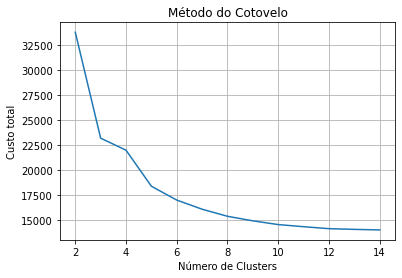

In [8]:
plt.plot(range(2, 15), cost)
plt.grid()
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo total')
plt.savefig('02-3_k-proto_metodo_cotovelo.png')
plt.show()

---
Considerando que o teste com o Método do Cotovelo não foi conclusivo, já que é possível que o número se situe entre 3 e 5 clusters, e que o método de Análise de Silhueta, para tentar identificar o número ótimo de clusters, não se aplica à classificação em tela porque o algoritmo K-Prototypes usa duas medidas distintas para agregação (uma para os valores quantitativos e outra para os valores categóricos), irei analisar os resultados para 3, 4 e 5 clusters.

___

### 4.4 Treinando o algoritmo K-Prototypes

In [9]:
# from kmodes.kprototypes import KPrototypes
kproto3 =  KPrototypes(n_clusters = 3, init = 'Cao',verbose = 1, n_init = 6, n_jobs = 12, random_state=406)
y_kproto3 = kproto3.fit_predict(dataset_cluster_normalized, categorical=[0,1,15,16,17])

kproto4 =  KPrototypes(n_clusters = 4, init = 'Cao',verbose = 1, n_init = 6, n_jobs = 12, random_state=406)
y_kproto4 = kproto4.fit_predict(dataset_cluster_normalized, categorical=[0,1,15,16,17])

kproto5 =  KPrototypes(n_clusters = 5, init = 'Cao',verbose = 1, n_init = 6, n_jobs = 12, random_state=406)
y_kproto5 = kproto5.fit_predict(dataset_cluster_normalized, categorical=[0,1,15,16,17])



Best run was number 2
Best run was number 6
Best run was number 6


### 4.5 Separando os agrupamentos para análise e identificação

### Análise dos clusters

---
Em primeiro lugar, após a geração de um dataset com a solução encontrada para cada número de clusters, totalizei os valores das colunas para cada cluster em um dataframe nomeado `cluster_X`, onde X é o total de clusters criados.


A partir dos totais por cluster, avaliei cada solução com base em alguns indicadores, a saber:

<ol>
    <li>Arrecadação x Receita Bruta: avalia a parcela de valores arrecadados em relação à Receita Bruta dos integrantes do Cluster</li>
    <li>Débito Declarado x Arrecadação: avalia se houve arrecadação atípica, decorrente do recolhimento de autos de infração, por exemplo, que não são declarados em DCTF</li>
    <li>Valor Pago x Débito Declarado: avalia o quanto foi pago em DARF para quitar os débitos declarados</li>
    <li>Valor Compensado x Débito Declarado: avalia o quanto foi utilizado em créditos via PERDCOMP - transmitidos, ou não, em 2019 - para quitar os débitos declarados</li>
    <li>Valor Suspenso x Débito Declarado: avalia o quanto foi suspenso judicialmente, através de decisão ou por depósito, em relação ao débito declarado</li>
    <li>Saldo a pagar x Débito Declarado: avalia a inadimplência do contribuinte em relação ao débito declarado</li>
    <li>Dívida total x Receita Bruta: indica o volume de créditos tributários constituídos contra o contribuinte em relação à Receita Bruta, como proxy para a exposição do contribuinte</li>
    <li>Créditos vs Receita Bruta: avalia quanto o contribuinte apresentou em créditos contra a Fazenda Pública. </li>
</ol>
    
---  

In [10]:
## Formatação das tabelas

pd.set_option('max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#### 4.5.1 Análise `n_cluster= 3` clusters

In [11]:
dataset_kproto3 = dataset_base_class.copy()
dataset_kproto3 = dataset_kproto3.assign(cluster=pd.DataFrame(y_kproto3).values)

---
### Criação do Dataframe totalizando os valores por cluster

___

In [12]:
clusters_3 = pd.DataFrame(columns = ['cluster'])

clusters_3.cluster = ['cluster 0', 'cluster 1', 'cluster 2']


for i in range(0,3):

    # Contagem de contribuintes por clusters

    clusters_3.at[i, 'contribuintes'] = len(dataset_kproto3[dataset_kproto3['cluster']==i])

    # Dados agregados de Receita do Bruta

    clusters_3.at[i,'receita_bruta_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].pj_receita_bruta)

    # Dados agregados de Arrecadação


    clusters_3.at[i,'arrecadacao_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].pj_arrecadacao)

    # Dados agregados do valor declarado de débitos

    clusters_3.at[i,'valor_debito_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].dctf_valor_debito)

    # Dados agregados do valor pago em DCTF

    clusters_3.at[i,'valor_pago_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].dctf_valor_pago)

    # Dados agregados de valores compensados

    clusters_3.at[i,'valor_compensado'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].dctf_valor_comp_dcomp)

    # Dados agregados de valores suspensos

    clusters_3.at[i,'valor_suspenso'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].dctf_valor_suspenso)

    # Dados agregados de Saldo a Pagar

    clusters_3.at[i,'saldo_pagar_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].dctf_valor_saldo_pagar)


    # Dados agregados de créditos apresentados em PER/DCOMP


    clusters_3.at[i,'dcomp_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].credito_total_perdcomp)

    # Dados agregados de débitos exigíveis em 31/12/2019

    clusters_3.at[i,'devedor_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_devedor)

    # Dados agregados de débitos suspensos judicialmente em 31/12/2019

    clusters_3.at[i,'judicial_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_susp_judicial)


    # Dados agregados de débitos suspensos administrativamente em 31/12/2019

    clusters_3.at[i,'admin_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_susp_admin)


    # Dados agregados de débitos totais constituídos em 31/12/2019

    total = (sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_susp_admin) +
             sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_susp_judicial) +
             sum(dataset_kproto3[dataset_kproto3['cluster']==i].debitos_total_devedor))

    clusters_3.at[i,'debitos_total'] = total


    # Dados agregados de créditos declarados contra a Fazenda Pública em 2019

    clusters_3.at[i,'credito_total'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].credito_total_perdcomp)



    # Contagem dos totais de contribuintes por variável categórica no cluster

    clusters_3.at[i,'Grande'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].Porte_Grande)
    clusters_3.at[i,'Médio'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].Porte_Médio)
    clusters_3.at[i,'Pequeno'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].Porte_Pequeno)

    clusters_3.at[i,'Diferenciados'] = (
        sum(dataset_kproto3[dataset_kproto3['cluster']==i].status_diferenciada) -
        sum(dataset_kproto3[dataset_kproto3['cluster']==i].status_especial))

    clusters_3.at[i,'Especiais'] = sum(dataset_kproto3[dataset_kproto3['cluster']==i].status_especial)



clusters_3.head(10)

,cluster,contribuintes,receita_bruta_total,arrecadacao_total,valor_debito_total,valor_pago_total,valor_compensado,valor_suspenso,saldo_pagar_total,dcomp_total,devedor_total,judicial_total,admin_total,debitos_total,credito_total,Grande,Médio,Pequeno,Diferenciados,Especiais
0,cluster 0,"114,000.00","2,288,353,390,722.58","311,023,590,734.44","182,160,521,918.48","140,897,474,188.49","28,324,900,079.00","2,974,835,846.17","5,118,531,081.49","58,735,252,075.08","24,766,271,592.89","48,406,572,943.06","390,614,823,130.48","463,787,667,666.43","58,735,252,075.08","1,666.00","4,149.00","108,185.00","1,244.00",422.00
1,cluster 1,"35,432.00","5,963,361,853.58","14,894,963,078.23","5,549,461,827.34","4,821,973,592.69","479,007,630.00","23,636,023.89","83,429,450.11","908,211,807.74","105,528,949.42","61,210,995.50","544,150,870.10","710,890,815.02","908,211,807.74",83.00,277.00,"35,072.00",73.00,10.00
2,cluster 2,"23,450.00","27,869,891,985.67","22,189,277,591.62","21,548,540,563.22","16,635,132,625.37","930,621,897.00","501,781,524.47","1,957,577,414.10","1,225,604,830.91","156,414,366.10","196,536,134.09","1,821,598,202.11","2,174,548,702.30","1,225,604,830.91",79.00,260.00,"23,111.00",55.00,24.00


---
### Criação do Dataframe com os indicadores

___

In [13]:
indicadores_3 = pd.DataFrame(columns = ['cluster'])

indicadores_3.cluster = ['cluster 0', 'cluster 1', 'cluster 2']

for i in range(0, 3):

    indicadores_3.at[i, 'arrec_rb']= float(clusters_3[clusters_3.index==i].arrecadacao_total/
                                               clusters_3[clusters_3.index==i].receita_bruta_total)

    indicadores_3.at[i, 'debito_arrec']= float(clusters_3[clusters_3.index==i].valor_debito_total/
                                               clusters_3[clusters_3.index==i].arrecadacao_total)


    indicadores_3.at[i, 'pago_declarado']= float(clusters_3[clusters_3.index==i].valor_pago_total/
                                               clusters_3[clusters_3.index==i].valor_debito_total)

    indicadores_3.at[i, 'compensado_declarado']= float(clusters_3[clusters_3.index==i].valor_compensado/
                                               clusters_3[clusters_3.index==i].valor_debito_total)

    indicadores_3.at[i, 'suspenso_declarado']= float(clusters_3[clusters_3.index==i].valor_suspenso/
                                               clusters_3[clusters_3.index==i].valor_debito_total)


    indicadores_3.at[i, 'saldo_pagar_deb']= float(clusters_3[clusters_3.index==i].saldo_pagar_total/
                                               clusters_3[clusters_3.index==i].valor_debito_total)

    indicadores_3.at[i, 'divida_total_rb']= float(clusters_3[clusters_3.index==i].debitos_total/
                                               clusters_3[clusters_3.index==i].receita_bruta_total)

    indicadores_3.at[i, 'credito_rb']= float(clusters_3[clusters_3.index==i].credito_total/
                                               clusters_3[clusters_3.index==i].receita_bruta_total)


indicadores_3.head(10)

,cluster,arrec_rb,debito_arrec,pago_declarado,compensado_declarado,suspenso_declarado,saldo_pagar_deb,divida_total_rb,credito_rb
0,cluster 0,0.14,0.59,0.77,0.16,0.02,0.03,0.20,0.03
1,cluster 1,2.50,0.37,0.87,0.09,0.00,0.02,0.12,0.15
2,cluster 2,0.80,0.97,0.77,0.04,0.02,0.09,0.08,0.04


---

### Análise da solução de 3 clusters

Considerando os indicadores acima, bem como analisando a base de contribuintes, podemos nomear os clusters da seguinte forma:

<ul>
    <li>Cluster 0: Baixa Arrecadação</li>
    <li>Cluster 1: Alta Arrecadação com valores atípicos</li>
    <li>Cluster 2: Alta Arrecadação</li>
</ul>

---

#### 4.5.2 Análise `n_cluster= 4` clusters

In [14]:
dataset_kproto4 = dataset_base_class.copy()
dataset_kproto4 = dataset_kproto4.assign(cluster=pd.DataFrame(y_kproto4).values)

---
### Criação do Dataframe totalizando os valores por cluster

___

In [15]:
clusters_4 = pd.DataFrame(columns = ['cluster'])

clusters_4.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']


for i in range(0,4):

    # Contagem de contribuintes por clusters

    clusters_4.at[i, 'contribuintes'] = len(dataset_kproto4[dataset_kproto4['cluster']==i])

    # Dados agregados de Receita do Bruta

    clusters_4.at[i,'receita_bruta_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].pj_receita_bruta)

    # Dados agregados de Arrecadação


    clusters_4.at[i,'arrecadacao_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].pj_arrecadacao)

    # Dados agregados do valor declarado de débitos

    clusters_4.at[i,'valor_debito_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_debito)

    # Dados agregados do valor pago em DCTF

    clusters_4.at[i,'valor_pago_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_pago)

    # Dados agregados de valores compensados

    clusters_4.at[i,'valor_compensado'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_comp_dcomp)

    # Dados agregados de valores suspensos

    clusters_4.at[i,'valor_suspenso'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_suspenso)

    # Dados agregados de Saldo a Pagar

    clusters_4.at[i,'saldo_pagar_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_saldo_pagar)


    # Dados agregados de créditos apresentados em PER/DCOMP


    clusters_4.at[i,'dcomp_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].credito_total_perdcomp)

    # Dados agregados de débitos exigíveis em 31/12/2019

    clusters_4.at[i,'devedor_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_devedor)

    # Dados agregados de débitos suspensos judicialmente em 31/12/2019

    clusters_4.at[i,'judicial_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_judicial)


    # Dados agregados de débitos suspensos administrativamente em 31/12/2019

    clusters_4.at[i,'admin_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_admin)


    # Dados agregados de débitos totais constituídos em 31/12/2019

    total = (sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_admin) +
             sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_judicial) +
             sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_devedor))

    clusters_4.at[i,'debitos_total'] = total


    # Dados agregados de créditos declarados contra a Fazenda Pública em 2019

    clusters_4.at[i,'credito_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].credito_total_perdcomp)



    # Contagem dos totais de contribuintes por variável categórica no cluster

    clusters_4.at[i,'Grande'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Grande)
    clusters_4.at[i,'Médio'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Médio)
    clusters_4.at[i,'Pequeno'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Pequeno)

    clusters_4.at[i,'Diferenciados'] = (
        sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_diferenciada) -
        sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_especial))

    clusters_4.at[i,'Especiais'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_especial)



clusters_4.head(10)

,cluster,contribuintes,receita_bruta_total,arrecadacao_total,valor_debito_total,valor_pago_total,valor_compensado,valor_suspenso,saldo_pagar_total,dcomp_total,devedor_total,judicial_total,admin_total,debitos_total,credito_total,Grande,Médio,Pequeno,Diferenciados,Especiais
0,cluster 0,"94,767.00","198,949,382,512.73","5,789,048,896.62","5,361,433,465.70","2,536,549,056.78","527,025,069.00","25,081,745.96","1,713,488,745.37","1,360,683,416.63","608,198,256.20","487,051,324.15","3,030,771,184.49","4,126,020,764.84","1,360,683,416.63",0.00,0.00,"94,767.00",0.00,0.00
1,cluster 1,"22,795.00","2,606,454,789.79","7,972,132,595.10","8,777,542,252.68","5,389,374,217.24","477,202,404.00","15,992,344.96","1,785,344,376.12","595,129,289.71","62,660,351.18","28,717,087.86","228,683,369.14","320,060,808.18","595,129,289.71",42.00,183.00,"22,570.00",33.00,9.00
2,cluster 2,"20,044.00","2,117,693,551,632.57","321,588,748,069.38","190,336,298,281.01","150,291,232,660.91","28,329,317,296.00","3,449,358,759.44","3,580,812,727.66","58,161,785,045.44","24,281,374,336.28","48,102,611,734.86","389,459,076,501.61","461,843,062,572.75","58,161,785,045.44","1,718.00","4,256.00","14,070.00","1,279.00",439.00
3,cluster 3,"35,276.00","2,937,255,626.74","12,757,901,843.19","4,783,250,309.65","4,137,424,471.62","400,984,837.00","9,820,544.17","79,892,096.55","751,470,961.95","75,981,964.75","45,939,925.78","262,041,147.45","383,963,037.98","751,470,961.95",68.00,247.00,"34,961.00",60.00,8.00


---
### Criação do Dataframe com os indicadores

___

In [16]:
indicadores_4 = pd.DataFrame(columns = ['cluster'])

indicadores_4.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']

for i in range(0, 4):

    indicadores_4.at[i, 'arrec_rb']= float(clusters_4[clusters_4.index==i].arrecadacao_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)

    indicadores_4.at[i, 'debito_arrec']= float(clusters_4[clusters_4.index==i].valor_debito_total/
                                               clusters_4[clusters_4.index==i].arrecadacao_total)


    indicadores_4.at[i, 'pago_declarado']= float(clusters_4[clusters_4.index==i].valor_pago_total/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'compensado_declarado']= float(clusters_4[clusters_4.index==i].valor_compensado/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'suspenso_declarado']= float(clusters_4[clusters_4.index==i].valor_suspenso/
                                               clusters_4[clusters_4.index==i].valor_debito_total)


    indicadores_4.at[i, 'saldo_pagar_deb']= float(clusters_4[clusters_4.index==i].saldo_pagar_total/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'divida_total_rb']= float(clusters_4[clusters_4.index==i].debitos_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)

    indicadores_4.at[i, 'credito_rb']= float(clusters_4[clusters_4.index==i].credito_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)


indicadores_4.head(10)

,cluster,arrec_rb,debito_arrec,pago_declarado,compensado_declarado,suspenso_declarado,saldo_pagar_deb,divida_total_rb,credito_rb
0,cluster 0,0.03,0.93,0.47,0.10,0.00,0.32,0.02,0.01
1,cluster 1,3.06,1.10,0.61,0.05,0.00,0.20,0.12,0.23
2,cluster 2,0.15,0.59,0.79,0.15,0.02,0.02,0.22,0.03
3,cluster 3,4.34,0.37,0.86,0.08,0.00,0.02,0.13,0.26


---

### Análise da solução de 4 clusters

Considerando os indicadores acima, bem como analisando a base de contribuintes, podemos nomear os clusters da seguinte forma:

<ul>
    <li>Cluster 0: Baixa Arrecadação</li>
    <li>Cluster 1: Alta Arrecadação com redução de litigância </li>
    <li>Cluster 2: Baixa Arrecadação com valores atípicos</li>
    <li>Cluster 3: Alta Arrecadação com valores atípicos</li>
</ul>

---

#### 4.5.3 Análise `n_cluster= 5` clusters

In [17]:
dataset_kproto5 = dataset_base_class.copy()
dataset_kproto5 = dataset_kproto5.assign(cluster=pd.DataFrame(y_kproto5).values)

---
### Criação do Dataframe totalizando os valores por cluster

___

In [18]:
clusters_5 = pd.DataFrame(columns = ['cluster'])

clusters_5.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']


for i in range(0,5):

    # Contagem de contribuintes por clusters

    clusters_5.at[i, 'contribuintes'] = len(dataset_kproto5[dataset_kproto5['cluster']==i])

    # Dados agregados de Receita do Bruta

    clusters_5.at[i,'receita_bruta_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].pj_receita_bruta)

    # Dados agregados de Arrecadação


    clusters_5.at[i,'arrecadacao_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].pj_arrecadacao)

    # Dados agregados do valor declarado de débitos

    clusters_5.at[i,'valor_debito_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_debito)

    # Dados agregados do valor pago em DCTF

    clusters_5.at[i,'valor_pago_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_pago)

    # Dados agregados de valores compensados

    clusters_5.at[i,'valor_compensado'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_comp_dcomp)

    # Dados agregados de valores suspensos

    clusters_5.at[i,'valor_suspenso'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_suspenso)

    # Dados agregados de Saldo a Pagar

    clusters_5.at[i,'saldo_pagar_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_saldo_pagar)


    # Dados agregados de créditos apresentados em PER/DCOMP


    clusters_5.at[i,'dcomp_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].credito_total_perdcomp)

    # Dados agregados de débitos exigíveis em 31/12/2019

    clusters_5.at[i,'devedor_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_devedor)

    # Dados agregados de débitos suspensos judicialmente em 31/12/2019

    clusters_5.at[i,'judicial_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_judicial)


    # Dados agregados de débitos suspensos administrativamente em 31/12/2019

    clusters_5.at[i,'admin_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_admin)


    # Dados agregados de débitos totais constituídos em 31/12/2019

    total = (sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_admin) +
             sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_judicial) +
             sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_devedor))

    clusters_5.at[i,'debitos_total'] = total


    # Dados agregados de créditos declarados contra a Fazenda Pública em 2019

    clusters_5.at[i,'credito_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].credito_total_perdcomp)



    # Contagem dos totais de contribuintes por variável categórica no cluster

    clusters_5.at[i,'Grande'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Grande)
    clusters_5.at[i,'Médio'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Médio)
    clusters_5.at[i,'Pequeno'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Pequeno)

    clusters_5.at[i,'Diferenciados'] = (
        sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_diferenciada) -
        sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_especial))

    clusters_5.at[i,'Especiais'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_especial)



clusters_5.head(10)

,cluster,contribuintes,receita_bruta_total,arrecadacao_total,valor_debito_total,valor_pago_total,valor_compensado,valor_suspenso,saldo_pagar_total,dcomp_total,devedor_total,judicial_total,admin_total,debitos_total,credito_total,Grande,Médio,Pequeno,Diferenciados,Especiais
0,cluster 0,"94,545.00","196,765,727,137.35","5,625,378,468.15","5,196,246,286.98","2,456,891,851.51","513,878,708.00","23,238,848.40","1,667,903,547.33","1,334,979,383.91","575,986,005.03","467,969,708.15","2,893,901,192.01","3,937,856,905.19","1,334,979,383.91",0.00,0.00,"94,545.00",0.00,0.00
1,cluster 1,"12,794.00","328,231,793.79","279,531,453.25","1,542,159,277.97","155,692,929.41","18,780,441.00","1,809,430.33","1,260,673,405.76","45,604,392.46","41,787,836.56","348,737.36","20,011,661.97","62,148,235.89","45,604,392.46",0.00,27.00,"12,767.00",0.00,0.00
2,cluster 2,"19,969.00","2,099,496,716,076.33","309,728,446,482.27","179,964,435,049.44","140,831,297,933.72","28,014,547,502.00","2,977,851,689.45","3,653,817,282.47","57,734,381,058.51","24,283,798,878.93","48,057,165,202.44","388,311,505,278.10","460,652,469,359.47","57,734,381,058.51","1,695.00","4,207.00","14,067.00","1,264.00",431.00
3,cluster 3,"32,369.00","991,523,596.90","5,265,696,591.38","723,077,936.64","595,940,832.91","89,029,213.00","3,436,767.93","24,568,621.88","258,166,181.66","9,651,326.36","13,664,472.55","51,198,929.47","74,514,728.38","258,166,181.66",28.00,112.00,"32,229.00",26.00,2.00
4,cluster 4,"13,205.00","24,604,445,957.46","27,208,778,409.24","21,832,605,758.01","18,314,756,859.00","1,098,293,742.00","493,916,658.42","552,575,088.26","1,495,937,697.19","116,990,861.53","125,171,952.15","1,703,955,141.14","1,946,117,954.82","1,495,937,697.19",105.00,340.00,"12,760.00",82.00,23.00


---
### Criação do Dataframe com os indicadores

___

In [19]:
indicadores_5 = pd.DataFrame(columns = ['cluster'])

indicadores_5.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

for i in range(0, 5):

    indicadores_5.at[i, 'arrec_rb']= float(clusters_5[clusters_5.index==i].arrecadacao_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)

    indicadores_5.at[i, 'debito_arrec']= float(clusters_5[clusters_5.index==i].valor_debito_total/
                                               clusters_5[clusters_5.index==i].arrecadacao_total)


    indicadores_5.at[i, 'pago_declarado']= float(clusters_5[clusters_5.index==i].valor_pago_total/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'compensado_declarado']= float(clusters_5[clusters_5.index==i].valor_compensado/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'suspenso_declarado']= float(clusters_5[clusters_5.index==i].valor_suspenso/
                                               clusters_5[clusters_5.index==i].valor_debito_total)


    indicadores_5.at[i, 'saldo_pagar_deb']= float(clusters_5[clusters_5.index==i].saldo_pagar_total/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'divida_total_rb']= float(clusters_5[clusters_5.index==i].debitos_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)

    indicadores_5.at[i, 'credito_rb']= float(clusters_5[clusters_5.index==i].credito_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)


indicadores_5.head(10)

,cluster,arrec_rb,debito_arrec,pago_declarado,compensado_declarado,suspenso_declarado,saldo_pagar_deb,divida_total_rb,credito_rb
0,cluster 0,0.03,0.92,0.47,0.10,0.00,0.32,0.02,0.01
1,cluster 1,0.85,5.52,0.10,0.01,0.00,0.82,0.19,0.14
2,cluster 2,0.15,0.58,0.78,0.16,0.02,0.02,0.22,0.03
3,cluster 3,5.31,0.14,0.82,0.12,0.00,0.03,0.08,0.26
4,cluster 4,1.11,0.80,0.84,0.05,0.02,0.03,0.08,0.06


---

### Análise da solução de 5 clusters

Considerando os indicadores acima, bem como analisando a base de contribuintes, podemos nomear os clusters da seguinte forma:

<ul>
    <li>Cluster 0: Arrecadação muito baixa</li>
    <li>Cluster 1: Devedores Contumazes</li>
    <li>Cluster 2: Baixa Arrecadação com valores atípicos</li>
    <li>Cluster 3: Alta Arrecadação com redução de litigância</li>
    <li>Cluster 4: Alta Arrecadação</li>
</ul>

---

# 5. Conclusão

---
Após a análise dos cluster executados neste notebook e no notebbok '02-2_classificacao_k-prototypes_(diferenciados_especiais)', decidi pela utilização da solução com 4 cluster gerada utilizando todas as variáveis categóricas.

___

In [20]:
dataset_final4 = dataset_kproto4.drop(['pj_receita_bruta', 'pj_arrecadacao', 'dctf_valor_debito',
                'dctf_valor_pago', 'dctf_valor_comp_dcomp', 'dctf_valor_comp_processo',
                'dctf_valor_deducao_darf', 'dctf_valor_suspenso', 'dctf_valor_parcelado', 
                'dctf_valor_saldo_pagar', 'debitos_total_devedor', 'debitos_total_susp_judicial',
                'debitos_total_susp_admin', 'debitos_total_pend_comp', 'credito_total_perdcomp'], axis=1)

In [21]:
dataset_final4.to_csv('puc_tcc_4_clusters.csv', index=False)